In [167]:
# Stock Prediction - Create addtional features using existing Features

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

# For Training, Testing and building a Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,model_selection

from datetime import datetime

In [168]:
conn_str = ('server=WIN-EEL3AK31AJF;database=DatapyDB;TRUSTED_CONNECTION=yes')
#df = pd.read_csv('D:\\data\\XBIT_12032019.csv')

In [169]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 13 for SQL Server};' + conn_str)

In [170]:
sql = "SELECT * from [DatapyDB].[dbo].[vwStock] where StockSym = 'MSFT'"
df = pd.read_sql(sql,conn)

In [171]:
df.head()

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2
0,MSFT,2018-01-02,86.125,86.31,85.500,85.95,83.247,21993101,20.880,189.182,775655,609566
1,MSFT,2018-01-03,86.055,86.51,85.970,86.35,83.635,24173064,51.996,317.250,3246399,4185665
2,MSFT,2018-01-04,86.590,87.66,86.570,87.11,84.371,21145985,21.120,191.096,622183,734318
3,MSFT,2018-01-05,87.660,88.41,87.430,88.19,85.417,22526563,52.184,316.580,2609856,4578729
4,MSFT,2018-01-08,88.200,88.58,87.605,88.28,85.504,20293930,20.880,193.345,615252,765654


In [172]:
df.tail(1)

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2
485,MSFT,2019-12-05,150.05,150.32,149.48,149.93,149.93,16055655,72.44,11.33,3500595,300437


In [173]:
df = df.drop(['StockSym'],axis=1)
df = df.drop(['StockDt'],axis=1)

In [174]:
print(df.head())

   StockOpen  StockHigh  StockLow  StockClose  StockAdjClose  StockVol  \
0     86.125      86.31    85.500       85.95         83.247  21993101   
1     86.055      86.51    85.970       86.35         83.635  24173064   
2     86.590      87.66    86.570       87.11         84.371  21145985   
3     87.660      88.41    87.430       88.19         85.417  22526563   
4     88.200      88.58    87.605       88.28         85.504  20293930   

   StockAdjClose1  StockAdjClose2  StockVol1  StockVol2  
0          20.880         189.182     775655     609566  
1          51.996         317.250    3246399    4185665  
2          21.120         191.096     622183     734318  
3          52.184         316.580    2609856    4578729  
4          20.880         193.345     615252     765654  


In [175]:
days_infuture_to_predict = 1

df['prediction'] = df[['StockAdjClose']].shift(-days_infuture_to_predict)

#df['volume_lag2'] = df[['volume_lag1']].shift(-days_infuture_to_predict)
#df['volume_lag3'] = df[['volume_lag2']].shift(-days_infuture_to_predict)
#df['close_lag1'] = df[['Close']].shift(-days_infuture_to_predict)
#df['volume_lag1'] = df[['Volume']].shift(-days_infuture_to_predict)

In [176]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
0,86.125,86.31,85.500,85.95,83.247,21993101,20.880,189.182,775655,609566,83.635
1,86.055,86.51,85.970,86.35,83.635,24173064,51.996,317.250,3246399,4185665,84.371
2,86.590,87.66,86.570,87.11,84.371,21145985,21.120,191.096,622183,734318,85.417
3,87.660,88.41,87.430,88.19,85.417,22526563,52.184,316.580,2609856,4578729,85.504
4,88.200,88.58,87.605,88.28,85.504,20293930,20.880,193.345,615252,765654,85.446


In [177]:
df.tail(days_infuture_to_predict + 1)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
484,150.14,150.18,149.20,149.85,149.85,17580617,195.01,194.04,911537,981834,149.93
485,150.05,150.32,149.48,149.93,149.93,16055655,72.44,11.33,3500595,300437,NaN


In [178]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
count,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,4.860000e+02,4.860000e+02,485.000000
mean,114.387745,115.333257,113.254831,114.355298,112.737463,2.817692e+07,38.984595,163.119463,4.545047e+06,4.585329e+06,112.798268
std,17.728478,17.653605,17.729834,17.711123,18.435978,1.128786e+07,31.348174,140.113801,1.147931e+07,5.746246e+06,18.406166
min,86.055000,86.310000,83.830000,85.010000,82.337000,1.197730e+07,0.180000,0.372000,6.340000e+04,2.000000e+02,82.337000
25%,100.427500,101.469250,99.369750,100.860000,98.625500,2.065361e+07,7.500000,4.565000,8.922465e+05,1.330000e+04,98.750000
50%,109.420000,110.785000,108.226000,109.470000,107.394500,2.566796e+07,50.185500,194.410500,2.548346e+06,2.188096e+06,107.482000
75%,132.572500,133.895000,131.620000,132.417500,131.515750,3.223757e+07,66.947500,296.965000,3.878595e+06,7.364275e+06,131.548000
max,152.330000,152.500000,151.520000,152.320000,152.320000,1.112421e+08,195.010000,376.790000,1.494533e+08,3.364970e+07,152.320000


In [179]:
df.dropna(inplace=True)

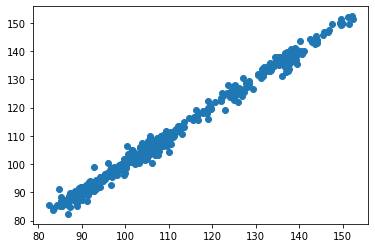

In [180]:
plt.scatter(df['StockAdjClose'],df['prediction'])

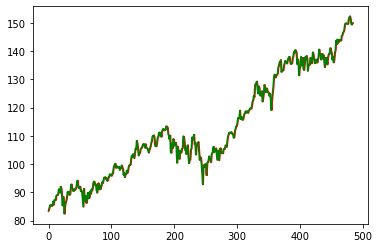

In [181]:
plt.plot(df['StockAdjClose'],color='red')
plt.plot(df['prediction'],color='green')

In [182]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
0,86.125,86.31,85.500,85.95,83.247,21993101,20.880,189.182,775655,609566,83.635
1,86.055,86.51,85.970,86.35,83.635,24173064,51.996,317.250,3246399,4185665,84.371
2,86.590,87.66,86.570,87.11,84.371,21145985,21.120,191.096,622183,734318,85.417
3,87.660,88.41,87.430,88.19,85.417,22526563,52.184,316.580,2609856,4578729,85.504
4,88.200,88.58,87.605,88.28,85.504,20293930,20.880,193.345,615252,765654,85.446


In [183]:
df.tail(1)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
484,150.14,150.18,149.2,149.85,149.85,17580617,195.01,194.04,911537,981834,149.93


In [184]:
X = np.array(df.drop(['prediction'],1))

In [185]:
X

array([[8.612500e+01, 8.631000e+01, 8.550000e+01, ..., 1.891820e+02,
        7.756550e+05, 6.095660e+05],
       [8.605500e+01, 8.651000e+01, 8.597000e+01, ..., 3.172500e+02,
        3.246399e+06, 4.185665e+06],
       [8.659000e+01, 8.766000e+01, 8.657000e+01, ..., 1.910960e+02,
        6.221830e+05, 7.343180e+05],
       ...,
       [1.518100e+02, 1.518300e+02, 1.483200e+02, ..., 1.958400e+02,
        6.963880e+05, 3.307750e+05],
       [1.474900e+02, 1.494300e+02, 1.466500e+02, ..., 1.091000e+01,
        2.652688e+06, 2.351030e+05],
       [1.501400e+02, 1.501800e+02, 1.492000e+02, ..., 1.940400e+02,
        9.115370e+05, 9.818340e+05]])

In [186]:
len(X)

485

In [187]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
count,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02,485.000000,485.000000,4.850000e+02,4.850000e+02,485.000000
mean,114.314214,115.261120,113.180140,114.281948,112.660777,2.820192e+07,38.915614,163.432431,4.547201e+06,4.594163e+06,112.798268
std,17.672443,17.599983,17.671435,17.655362,18.377258,1.128604e+07,31.343597,140.088320,1.149107e+07,5.748874e+06,18.406166
min,86.055000,86.310000,83.830000,85.010000,82.337000,1.197730e+07,0.180000,0.372000,6.340000e+04,2.000000e+02,82.337000
25%,100.410000,101.449000,99.353000,100.860000,98.584000,2.072791e+07,7.440000,4.500000,8.914390e+05,1.330000e+04,98.750000
50%,109.420000,110.710000,108.212000,109.450000,107.307000,2.569181e+07,50.104000,194.781000,2.546534e+06,2.465600e+06,107.482000
75%,132.400000,133.790000,131.560000,132.320000,131.419000,3.228084e+07,66.904000,297.040000,3.884656e+06,7.365900e+06,131.548000
max,152.330000,152.500000,151.520000,152.320000,152.320000,1.112421e+08,195.010000,376.790000,1.494533e+08,3.364970e+07,152.320000


In [188]:
X = X[:-days_infuture_to_predict]

In [189]:
len(X)

484

In [190]:
y = np.array(df['prediction'])

In [191]:
len(y)

485

In [192]:
y = y[:-days_infuture_to_predict]

In [193]:
len(y)

484

In [194]:
y

array([ 83.635,  84.371,  85.417,  85.504,  85.446,  85.058,  85.31 ,
        86.782,  85.572,  87.305,  87.267,  87.17 ,  88.729,  89.01 ,
        88.933,  89.426,  91.102,  90.966,  89.824,  92.022,  91.296,
        88.894,  85.233,  88.458,  86.792,  82.337,  85.407,  86.327,
        87.005,  88.361,  90.161,  89.519,  90.22 ,  89.023,  89.256,
        91.523,  92.847,  91.66 ,  91.241,  90.346,  90.541,  91.115,
        90.803,  91.329,  91.883,  93.937,  94.16 ,  91.864,  91.319,
        91.64 ,  92.049,  90.385,  90.619,  89.986,  87.369,  84.829,
        91.251,  87.057,  86.979,  88.809,  86.133,  87.291,  89.84 ,
        89.889,  87.797,  88.322,  90.375,  89.383,  91.056,  90.57 ,
        91.63 ,  93.479,  93.839,  93.518,  92.438,  92.779,  90.609,
        89.821,  91.718,  93.236,  90.998,  92.438,  90.988,  91.533,
        92.594,  93.625,  93.226,  94.326,  95.27 ,  95.065,  95.386,
        94.696,  94.939,  93.991,  94.167,  95.379,  95.281,  96.414,
        96.072,  96.

In [195]:
#X = preprocessing.scale(X)
#y = preprocessing.scale(y)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.5,random_state=0)

In [196]:
clf = DecisionTreeRegressor() 
#clf = LinearRegression() 
clf.fit(xtrain, ytrain)
r = clf.score(xtest,ytest)
#prediction = (clf.predict(X_prediction))

In [197]:
r

0.9832259021717686

In [198]:
ypred = clf.predict(xtest)
dfAP=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
dfAP

,Actual,Predicted
0,89.426,91.102
1,97.734,95.320
2,107.125,109.814
3,104.132,109.492
4,106.680,107.523
...,...,...
237,117.948,118.116
238,125.162,122.065
239,149.480,149.461
240,132.937,138.887


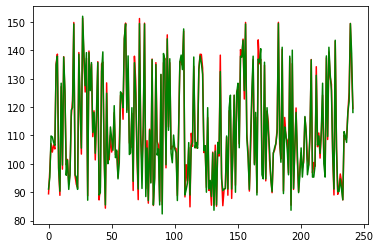

In [199]:
plt.plot(ytest,color="red")
plt.plot(ypred,color="green")


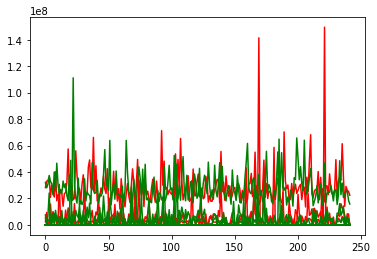

In [200]:
plt.plot(xtrain,color="red")
plt.plot(xtest,color="green")

In [201]:
x_forecast = np.array(df.drop(['prediction'],1))[-days_infuture_to_predict:]

In [202]:
len(x_forecast)

1

In [203]:
x_forecast

array([[1.5014000e+02, 1.5018000e+02, 1.4920000e+02, 1.4985000e+02,
        1.4985000e+02, 1.7580617e+07, 1.9501000e+02, 1.9404000e+02,
        9.1153700e+05, 9.8183400e+05]])

In [204]:
prediction = (clf.predict(x_forecast))

In [205]:
prediction

array([149.31])

In [206]:
last = prediction[len(prediction) -1 ]

In [207]:
last

149.31

In [208]:
prediction[0]

149.31